# Computer-Aided Musicology
## Chords and Harmonic Field
<p align="left">
<img src="./img/businesscard.jpg" width="500px" alt="Business Card" align="left" >
</p>
<br>

[www.rptecnologias.com](http://www.rptecnologias.com)
<br>
guitars.ai@rptecnologias.com


# Import Packages

In [1]:
#Imports 
from music21 import *
from IPython.display import Image
from collections import deque

# Auxiliary Function to Display Musical Score
def get_score_png():
    filename = ! ls *.png -Art | tail -n 1
    return(filename[0])

## Chord

"A chord is a harmonic unit with at least three different tones sounding simultaneously.
The term includes all possible such sonorities." 

- Benward, B., 2003. Music In Theory and Practice Spiral. Mcgraw-Hill College.

### Chord Properties

In [2]:
Cmajor = chord.Chord(['C','E','G'])

In [3]:
# http://web.mit.edu/music21/doc/moduleReference/moduleChord.html
print(Cmajor.fullName)
print(Cmajor.pitchedCommonName)
print(Cmajor.third)

Chord {C | E | G} Quarter
C-major triad
E


### Chord Transpose

In [4]:
chord2 = Cmajor.transpose('M3')
print(chord2.fullName)
print(chord2.pitchedCommonName)

Chord {E | G-sharp | B} Quarter
E-major triad


In [5]:
chord3 = Cmajor.transpose(4)
print(chord3.fullName)
print(chord3.pitchedCommonName)

Chord {E | G-sharp | B} Quarter
E-major triad


### Chord Display

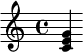

In [6]:
Cmajor.show('lily.png')
Image(filename=get_score_png())

## Harmonic Field
In general, a Harmonic Field can be seen as a group of chords created from notes of a specifc scale.

In [7]:
CMajorScale=scale.MajorScale(pitch.Pitch('C3'))
print("C Major Scale",[str(p) for p in CMajorScale.pitches])

C Major Scale ['C3', 'D3', 'E3', 'F3', 'G3', 'A3', 'B3', 'C4']


In [8]:
# Function to shift the Tonic to the Desired Degree of a Scale
def shift_notes(list_name, desired_degree):
    tmp_list=list(list_name)
    for i in range(desired_degree-1):
        tmp_list.pop(0)
        tmp_list.append(tmp_list[0].transpose('P8'))
    return tmp_list

In [9]:
notes_from_scale=[note.Note(p) for p in CMajorScale.pitches]

In [10]:
def harmonic_field(listOfNotes):
    chord_list=[]
    for i in range(len(listOfNotes)-1):
        chord_list.append(chord.Chord(shift_notes(listOfNotes,i+1)[::2]))
    return chord_list

In [11]:
[c.pitchedCommonName for c in harmonic_field(notes_from_scale)]

['C3-major seventh chord',
 'D3-minor seventh chord',
 'E3-minor seventh chord',
 'F3-major seventh chord',
 'G3-dominant seventh chord',
 'A3-minor seventh chord',
 'B3-half-diminished seventh chord']

In [12]:
harmonicFieldCMajorScale=[harmony.chordSymbolFigureFromChord(c) for c in harmonic_field(notes_from_scale)]
harmonicFieldCMajorScale

['Cmaj7', 'Dm7', 'Em7', 'Fmaj7', 'G7', 'Am7', 'B/o7']

In [13]:
s = stream.Score()
s.timeSignature = meter.TimeSignature('4/4')
s.append(clef.TrebleClef())
s.append(key.KeySignature(0))
s.append(note.Rest(quarterLength=4))
for c in harmonic_field(notes_from_scale):
    d=duration.Duration(4.0)
    c.duration=d
    c.addLyric(harmony.chordSymbolFigureFromChord(c))
    s.append(c)


Harmonic Field of C Major


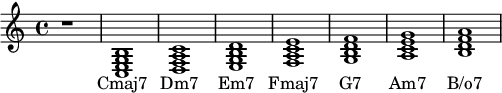

In [14]:
s.show('lily.png')
print("Harmonic Field of C Major")
Image(filename=get_score_png())

In [15]:
s.show('midi')